# Introduction
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

***Author: Alec Swainston***

## Loading In the Data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in Data
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [21]:
## Saving Data to variables (This will be used to label Columns and Rows later on)
countries = all_data.Country.unique()
years = all_data.Year.unique()

## How as life expectancy changed over time in the six nations?

The charts below compare Life Expectancy rates every year between 2000 and 2015. All countries have been steadily rising.  Zimbabwe specifically has increased the most, after a slight decrease between 2000 and 2004.  Interstingly Chile and Mexico both had dips in life expectancy during the same time period, which may be interesting to look into.

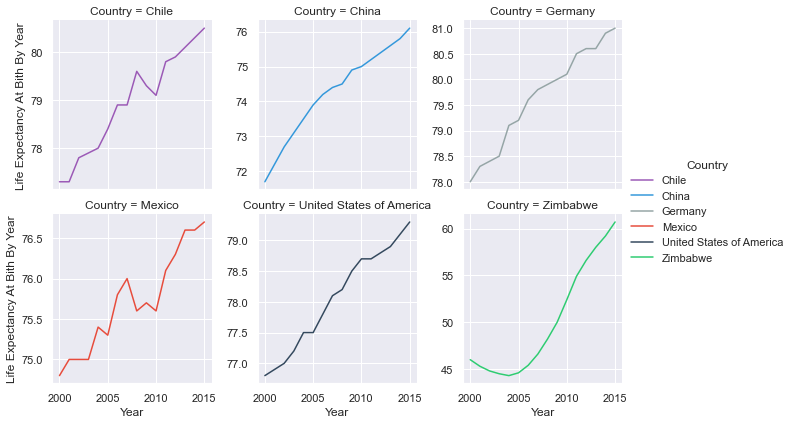

In [37]:
plotLEABY = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

plotLEABY = (plotLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy At Bith By Year"))

plotLEABY;

This chart puts all countries on the same graph.  Again we see a steady increase in all countries, with a sharp increase with Zimbabwe, however Zimbabwe is far below the 5 other countries.

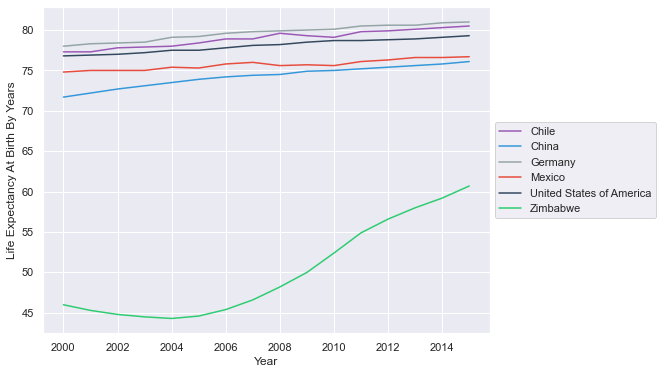

In [40]:
plt.figure(figsize=(8,6))
sns.lineplot(x=all_data.Year, y=all_data.LEABY, hue=all_data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life Expectancy At Birth By Years");

# How has GDP changed overtime for the last 6 countries?

This chart shows how GDP has changed between 2000 and 2015.  All countries have seen a rise in the 15 years.  All countries, except China saw a dip in 2008, likely related to the recession that occured during that year.  China was the only country to see positive growth during 2008.  

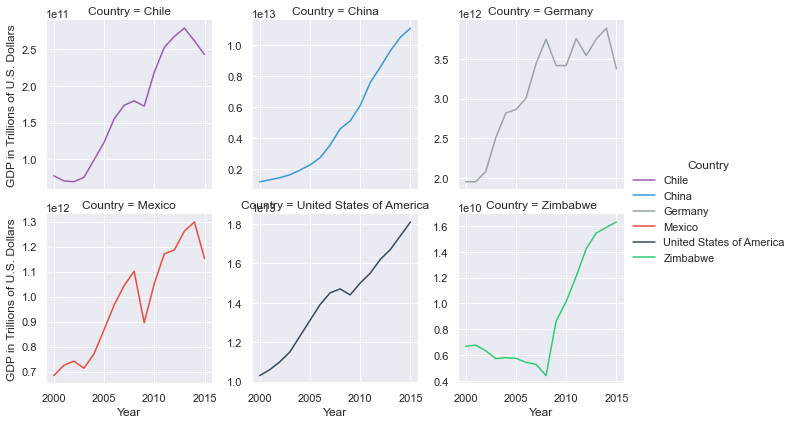

In [41]:
plotGDP = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

plotGDP = (plotGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

plotGDP;

The chart below compares all countries on the same graph.  It is clear to see that the USA has the highest GDP of the six countries.  China and the USA has seen the most growth during this time period.

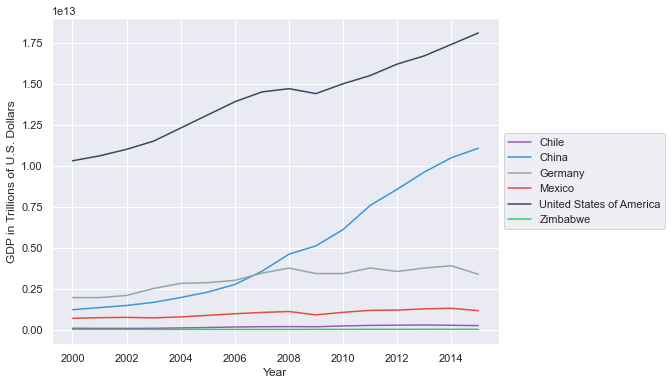

In [42]:
plt.figure(figsize=(8,6))
sns.lineplot(x=all_data.Year, y=all_data.GDP, hue=all_data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

## What kind of correlation is there between GDP and Life Expectancy?

Using a scatter plot of each country we are able to compare how GDP and Life Expectancy correlate.  We can see that there is a positive correlation for all countries in our list as GDP and Life Expectancy rise.  China's seems to be almost exponential in it's growth over time, while the US almost follows a linear line.

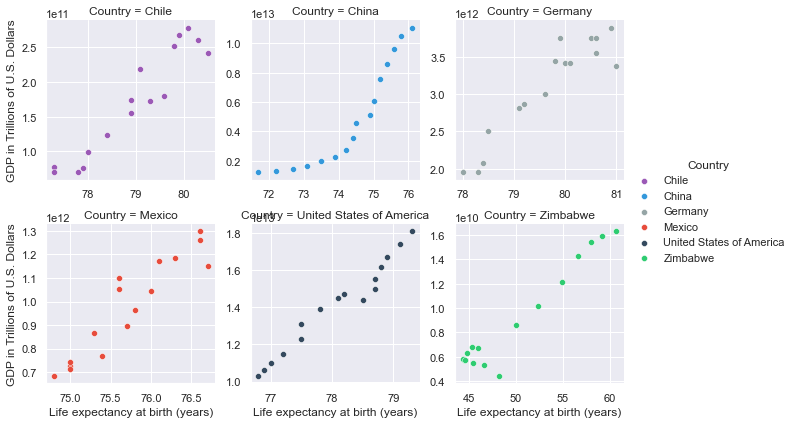

In [47]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

When comparing all countries, Zimbabwe looks as if it has had no growth even though they have.  China and the US have very similar growth patterns. 

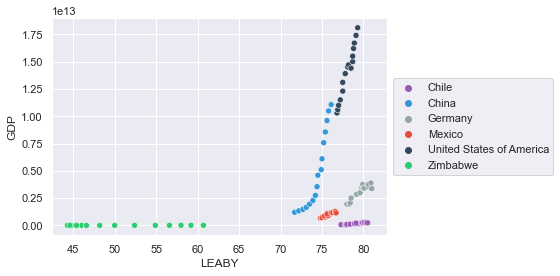

In [44]:
sns.scatterplot(x=all_data.LEABY, y=all_data.GDP, hue=all_data.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

## What is the average life expectancy & GDP of these nations?

In [63]:
all_data_means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
all_data

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


#### Average Life Expectancy
The average life expectancy sits in the mid 70's, with the exception of Zimbabwe being around 50.

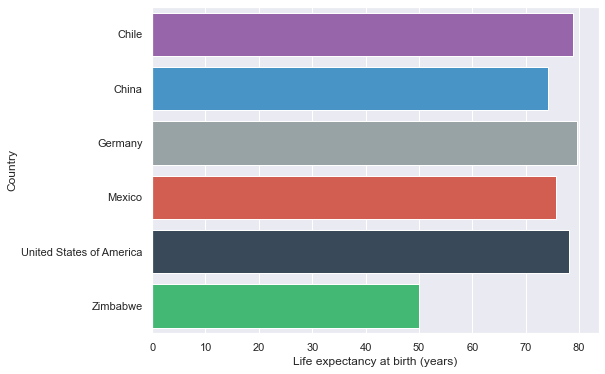

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=all_data_means)
plt.xlabel("Life expectancy at birth (years)");

#### Average GDP
The United States has more GDP than the other 5 countries combined

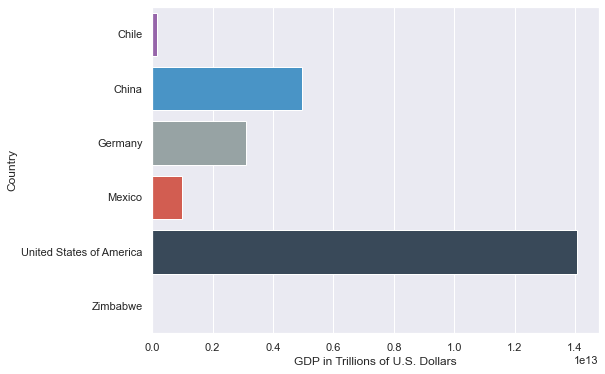

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=all_data_means)
plt.xlabel("GDP in Trillions of U.S. Dollars");

## What is the distribution of that life expectancy?

Using a Violin Plot we can visualize the distribution of the averages of each country.  Here we have plotted the GDP (left) and Life Expectancy (right).

* The GDP plot shows China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.
* The Life Expectancy plot shows many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

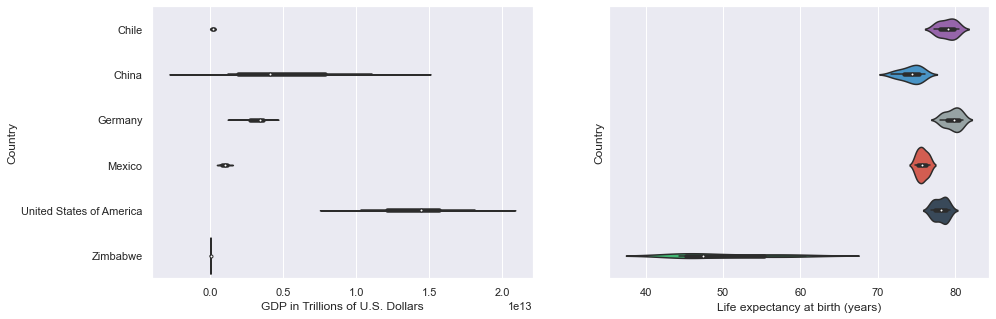

In [66]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=all_data.GDP, y=all_data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=all_data.LEABY, y=all_data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

## Conclusions
- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China. All countries (excluding China), saw a dip of GDP in 2008.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in this list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
